# Comparative Analysis of All Phoneme Pair Models

This notebook compares test results from all trained models for different phoneme pairs:
- **a-ɛ** (from `03.2.3_a-ɛ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **aː-a** (from `03.2.3_aː-a_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **aɪ̯-aː** (from `03.2.3_aɪ̯-aː_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **aʊ̯-aː** (from `03.2.3_aʊ̯-aː_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **b-p** (from `03.2.3_b-p_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **d-t** (from `03.2.3_d-t_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **g-k** (from `03.2.3_g-k_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **ç-ʃ** (from `03.2.3_ç-ʃ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **ç-x** (from `03.2.3_ç-x_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **eː-ɛ** (from `03.2.3_eː-ɛ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **ə-ɛ** (from `03.2.3_ə-ɛ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **iː-ɪ** (from `03.2.3_iː-ɪ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **kʰ-g** (from `03.2.3_kʰ-g_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **ŋ-n** (from `03.2.3_ŋ-n_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **oː-ɔ** (from `03.2.3_oː-ɔ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **ʁ-ɐ** (from `03.2.3_ʁ-ɐ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **s-ʃ** (from `03.2.3_s-ʃ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **tʰ-d** (from `03.2.3_tʰ-d_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **ts-s** (from `03.2.3_ts-s_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **uː-ʊ** (from `03.2.3_uː-ʊ_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **x-k** (from `03.2.3_x-k_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)
- **z-s** (from `03.2.3_z-s_improved_hybrid_cnn_mlp_v4_3_enhanced.ipynb`)

The notebook includes:
1. Confusion matrices for all phoneme pairs
2. F1-score comparison across all models


In [ ]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import json
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Project root
# Determine project root (parent of notebooks directory)
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()

# Define paths for all models (using v4_3_enhanced for all pairs)
MODELS_CONFIG = {
    'a-ɛ': {
        'name': 'a-ɛ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'a-ɛ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'a-ɛ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'a',
        'class_1': 'ɛ'
    },
    'aː-a': {
        'name': 'aː-a',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'aː-a_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'aː-a_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'aː',
        'class_1': 'a'
    },
    'aɪ̯-aː': {
        'name': 'aɪ̯-aː',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'aɪ̯-aː_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'aɪ̯-aː_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'aɪ̯',
        'class_1': 'aː'
    },
    'aʊ̯-aː': {
        'name': 'aʊ̯-aː',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'aʊ̯-aː_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'aʊ̯-aː_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'aʊ̯',
        'class_1': 'aː'
    },
    'b-p': {
        'name': 'b-p',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'b-p_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'b-p_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'b',
        'class_1': 'p'
    },
    'd-t': {
        'name': 'd-t',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'd-t_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'd-t_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'd',
        'class_1': 't'
    },
    'g-k': {
        'name': 'g-k',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'g-k_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'g-k_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'g',
        'class_1': 'k'
    },
    'ç-ʃ': {
        'name': 'ç-ʃ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'ç-ʃ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'ç-ʃ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'ç',
        'class_1': 'ʃ'
    },
    'ç-x': {
        'name': 'ç-x',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'ç-x_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'ç-x_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'ç',
        'class_1': 'x'
    },
    'eː-ɛ': {
        'name': 'eː-ɛ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'eː-ɛ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'eː-ɛ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'eː',
        'class_1': 'ɛ'
    },
    'ə-ɛ': {
        'name': 'ə-ɛ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'ə-ɛ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'ə-ɛ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'ə',
        'class_1': 'ɛ'
    },
    'iː-ɪ': {
        'name': 'iː-ɪ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'iː-ɪ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'iː-ɪ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'iː',
        'class_1': 'ɪ'
    },
    'kʰ-g': {
        'name': 'kʰ-g',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'kʰ-g_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'kʰ-g_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'kʰ',
        'class_1': 'ɡ'
    },
    'ŋ-n': {
        'name': 'ŋ-n',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'ŋ-n_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'ŋ-n_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'ŋ',
        'class_1': 'n'
    },
    'oː-ɔ': {
        'name': 'oː-ɔ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'oː-ɔ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'oː-ɔ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'oː',
        'class_1': 'ɔ'
    },
    'ʁ-ɐ': {
        'name': 'ʁ-ɐ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'ʁ-ɐ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'ʁ-ɐ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'ʁ',
        'class_1': 'ɐ'
    },
    's-ʃ': {
        'name': 's-ʃ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 's-ʃ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 's-ʃ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 's',
        'class_1': 'ʃ'
    },
    'tʰ-d': {
        'name': 'tʰ-d',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'tʰ-d_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'tʰ-d_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'tʰ',
        'class_1': 'd'
    },
    'ts-s': {
        'name': 'ts-s',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'ts-s_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'ts-s_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'ts',
        'class_1': 's'
    },
    'uː-ʊ': {
        'name': 'uː-ʊ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'uː-ʊ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'uː-ʊ_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'uː',
        'class_1': 'ʊ'
    },
    'x-k': {
        'name': 'x-k',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'x-k_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'x-k_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'x',
        'class_1': 'k'
    },
    'z-s': {
        'name': 'z-s',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'z-s_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'z-s_dl_models_with_context_v2' / 'improved_models' / 'hybrid_cnn_mlp_v4_3_enhanced' / 'test_metrics.json',
        'class_0': 'z',
        'class_1': 's'
    }
}

print("Configuration loaded successfully!")
print(f"Analyzing {len(MODELS_CONFIG)} phoneme pairs:")
for pair_key, config in MODELS_CONFIG.items():
    print(f"  - {config['name']} ({config['class_0']} vs {config['class_1']})")


Configuration loaded successfully!
Analyzing 22 phoneme pairs:
  - a-ɛ (a vs ɛ)
  - aː-a (aː vs a)
  - aɪ̯-aː (aɪ̯ vs aː)
  - aʊ̯-aː (aʊ̯ vs aː)
  - b-p (b vs p)
  - d-t (d vs t)
  - g-k (g vs k)
  - ç-ʃ (ç vs ʃ)
  - ç-x (ç vs x)
  - eː-ɛ (eː vs ɛ)
  - ə-ɛ (ə vs ɛ)
  - iː-ɪ (iː vs ɪ)
  - kʰ-g (kʰ vs ɡ)
  - ŋ-n (ŋ vs n)
  - oː-ɔ (oː vs ɔ)
  - ʁ-ɐ (ʁ vs ɐ)
  - s-ʃ (s vs ʃ)
  - tʰ-d (tʰ vs d)
  - ts-s (ts vs s)
  - uː-ʊ (uː vs ʊ)
  - x-k (x vs k)
  - z-s (z vs s)


## Part 1: Load Data for All Models


In [ ]:
# Load data for all models
all_predictions = {}
all_metrics = {}

print("="*80)
print("LOADING DATA FOR ALL MODELS")
print("="*80)

for pair_key, config in MODELS_CONFIG.items():
    print(f"Loading {config['name']}...")
    try:
        # Load predictions
        if config['predictions_path'].exists():
            predictions_df = pd.read_csv(config['predictions_path'])
            all_predictions[pair_key] = predictions_df
            print(f"  ✓ Loaded {len(predictions_df)} predictions")
            print(f"    Correct: {predictions_df['is_correct'].sum()}, Incorrect: {(~predictions_df['is_correct'].astype(bool)).sum()}")
        else:
            print(f"  ✗ Predictions file not found: {config['predictions_path']}")
            continue
        
        # Load metrics
        if config['metrics_path'].exists():
            with open(config['metrics_path'], 'r') as f:
                metrics = json.load(f)
            all_metrics[pair_key] = metrics
            print(f"  ✓ Loaded metrics:")
            print(f"    Accuracy: {metrics['accuracy']:.4f}, F1: {metrics['f1']:.4f}, ROC-AUC: {metrics['roc_auc']:.4f}")
        else:
            print(f"  ✗ Metrics file not found: {config['metrics_path']}")
    except Exception as e:
        print(f"  ✗ Error loading {config['name']}: {e}")

print(f"\n{'='*80}")
print(f"Successfully loaded {len(all_predictions)} models")
print(f"{'='*80}")


LOADING DATA FOR ALL MODELS
Loading a-ɛ...
  ✓ Loaded 14292 predictions
    Correct: 13954, Incorrect: 338
  ✓ Loaded metrics:
    Accuracy: 0.9764, F1: 0.9764, ROC-AUC: 0.9963
Loading aː-a...
  ✓ Loaded 11856 predictions
    Correct: 10017, Incorrect: 1839
  ✓ Loaded metrics:
    Accuracy: 0.8449, F1: 0.8484, ROC-AUC: 0.9264
Loading aɪ̯-aː...
  ✓ Loaded 8530 predictions
    Correct: 7755, Incorrect: 775
  ✓ Loaded metrics:
    Accuracy: 0.9091, F1: 0.9093, ROC-AUC: 0.9685
Loading aʊ̯-aː...
  ✓ Loaded 5953 predictions
    Correct: 5901, Incorrect: 52
  ✓ Loaded metrics:
    Accuracy: 0.9913, F1: 0.9913, ROC-AUC: 0.9994
Loading b-p...
  ✓ Loaded 5536 predictions
    Correct: 5303, Incorrect: 233
  ✓ Loaded metrics:
    Accuracy: 0.9579, F1: 0.9581, ROC-AUC: 0.9882
Loading d-t...
  ✓ Loaded 19949 predictions
    Correct: 18836, Incorrect: 1113
  ✓ Loaded metrics:
    Accuracy: 0.9442, F1: 0.9443, ROC-AUC: 0.9872
Loading g-k...
  ✓ Loaded 5698 predictions
    Correct: 5416, Incorrect: 282

## Part 2: Confusion Matrices for All Phoneme Pairs


In [ ]:
def plot_confusion_matrices(models_dict, start_idx=0, end_idx=None, n_cols=3, title_suffix=""):
    """
    Plot confusion matrices for a subset of models.
    
    Parameters:
    -----------
    models_dict : dict
        Dictionary with predictions data
    start_idx : int
        Starting index in the models dictionary
    end_idx : int
        Ending index (exclusive). If None, uses all remaining models
    n_cols : int
        Number of columns in the grid
    title_suffix : str
        Suffix to add to the title
    """
    # Convert to list to get items by index
    models_list = list(models_dict.items())
    if end_idx is None:
        end_idx = len(models_list)
    
    subset = models_list[start_idx:end_idx]
    n_pairs = len(subset)
    
    if n_pairs == 0:
        return
    
    n_rows = (n_pairs + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    
    # Flatten axes array for easier indexing
    # Handle different cases properly
    if n_pairs == 1:
        # Single subplot: axes is a single Axes object
        axes = [axes]
    elif n_rows == 1:
        # Single row: axes is 1D array (or single Axes if n_cols=1)
        if n_cols == 1:
            axes = [axes]
        else:
            axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        # Multiple rows: axes is 2D array
        axes = axes.flatten()
    
    # Ensure axes is a list/array we can index
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    elif isinstance(axes, np.ndarray):
        axes = axes.tolist()
    
    for idx, (pair_key, predictions_df) in enumerate(subset):
        ax = axes[idx]
        config = MODELS_CONFIG[pair_key]
        y_true = predictions_df['true_class_encoded'].values
        y_pred = predictions_df['predicted_class_encoded'].values
        cm = confusion_matrix(y_true, y_pred)
        
        # Normalize confusion matrix to percentages
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        # Create annotation labels with counts and percentages
        annot_labels = []
        for i in range(len(cm)):
            row = []
            for j in range(len(cm)):
                row.append(f'{cm[i, j]}\n({cm_percent[i, j]:.1f}%)')
            annot_labels.append(row)
        
        # Create heatmap
        sns.heatmap(
            cm, 
            annot=annot_labels,
            fmt='', 
            cmap='Blues',
            xticklabels=[config['class_0'], config['class_1']],
            yticklabels=[config['class_0'], config['class_1']],
            ax=ax,
            cbar_kws={'label': 'Count'}
        )
        
        ax.set_xlabel('Predicted', fontsize=12, fontweight='bold')
        ax.set_ylabel('True', fontsize=12, fontweight='bold')
        ax.set_title(f'{config["name"]}', fontsize=14, fontweight='bold')
    
    # Hide unused subplots
    for idx in range(n_pairs, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'Confusion Matrices: Phoneme Pairs{title_suffix}', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()


## Part 2.1: Confusion Matrices - Models 1-3


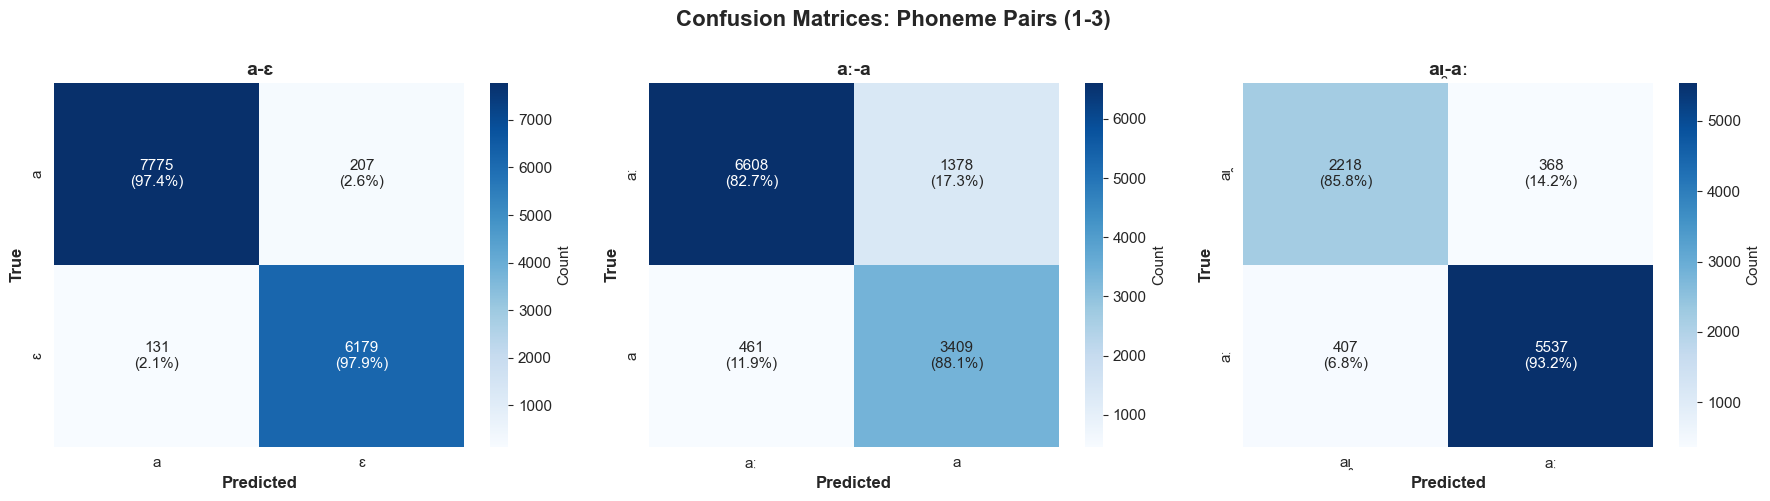

In [ ]:
# Part 2.1: Confusion Matrices - Models 1-3
plot_confusion_matrices(all_predictions, start_idx=0, end_idx=3, n_cols=3, title_suffix=' (1-3)')


## Part 2.2: Confusion Matrices - Models 4-6


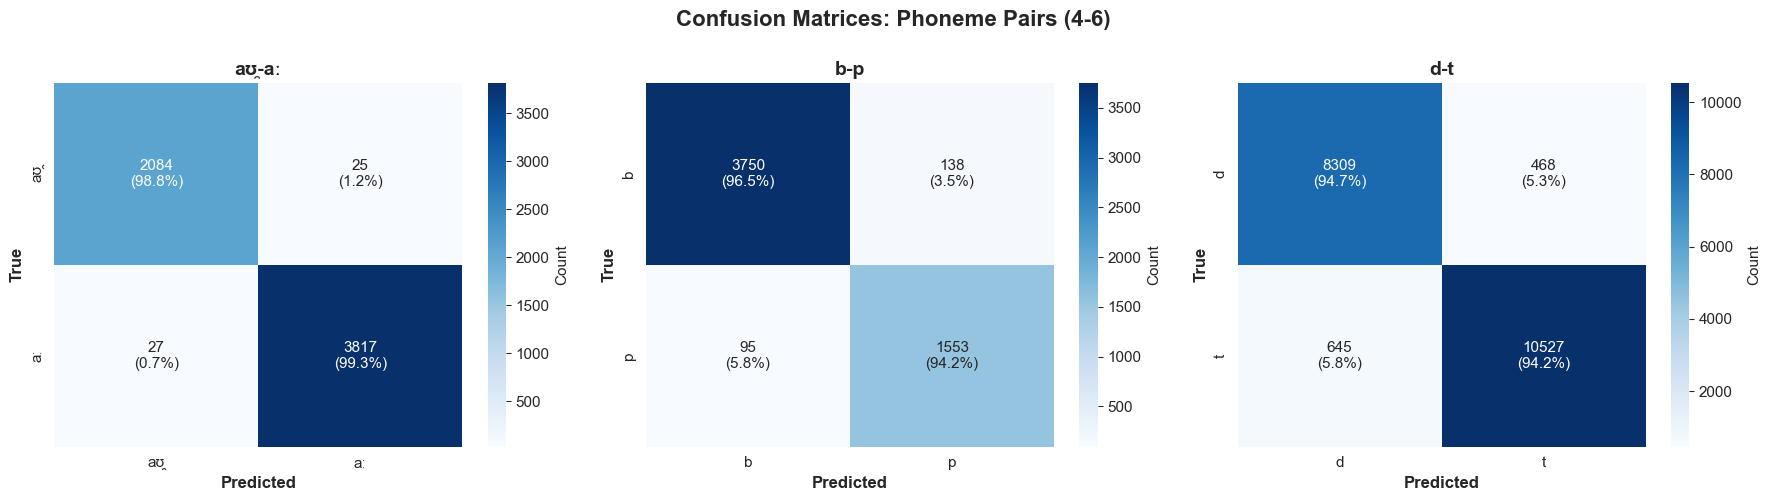

In [26]:
# Part 2.2: Confusion Matrices - Models 4-6
plot_confusion_matrices(all_predictions, start_idx=3, end_idx=6, n_cols=3, title_suffix=' (4-6)')


## Part 2.3: Confusion Matrices - Models 7-9


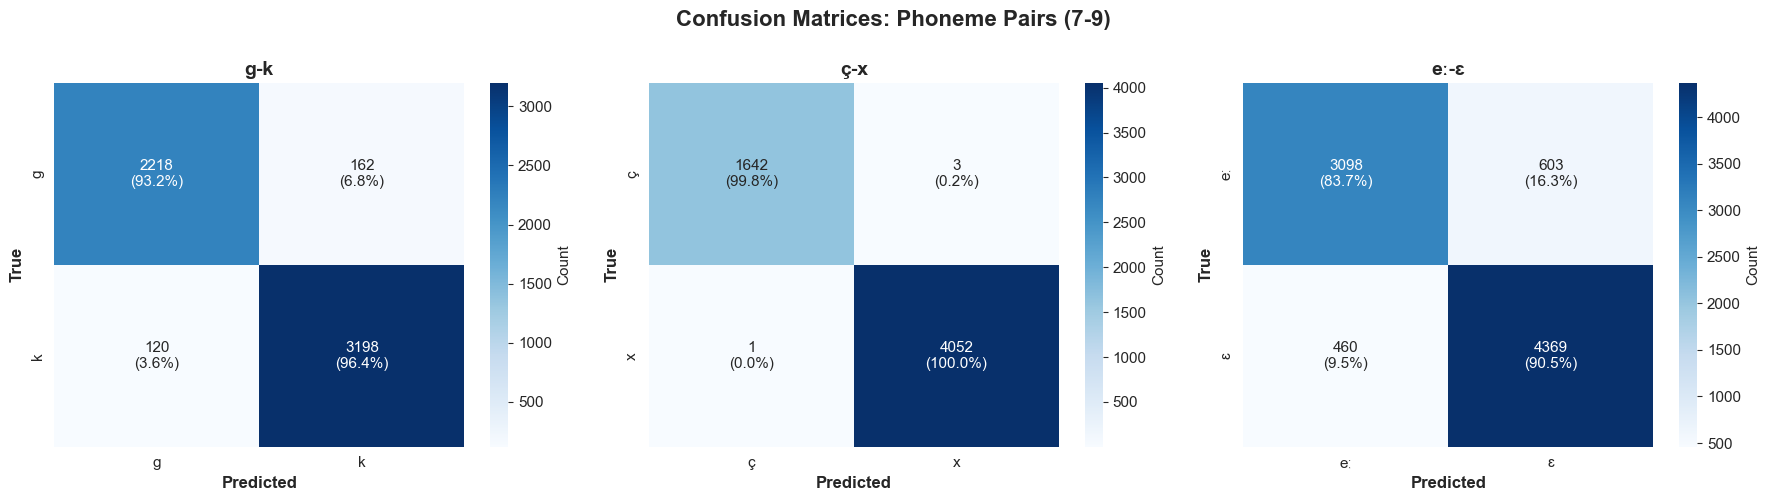

In [27]:
# Part 2.3: Confusion Matrices - Models 7-9
plot_confusion_matrices(all_predictions, start_idx=6, end_idx=9, n_cols=3, title_suffix=' (7-9)')


## Part 2.4: Confusion Matrices - Models 10-12


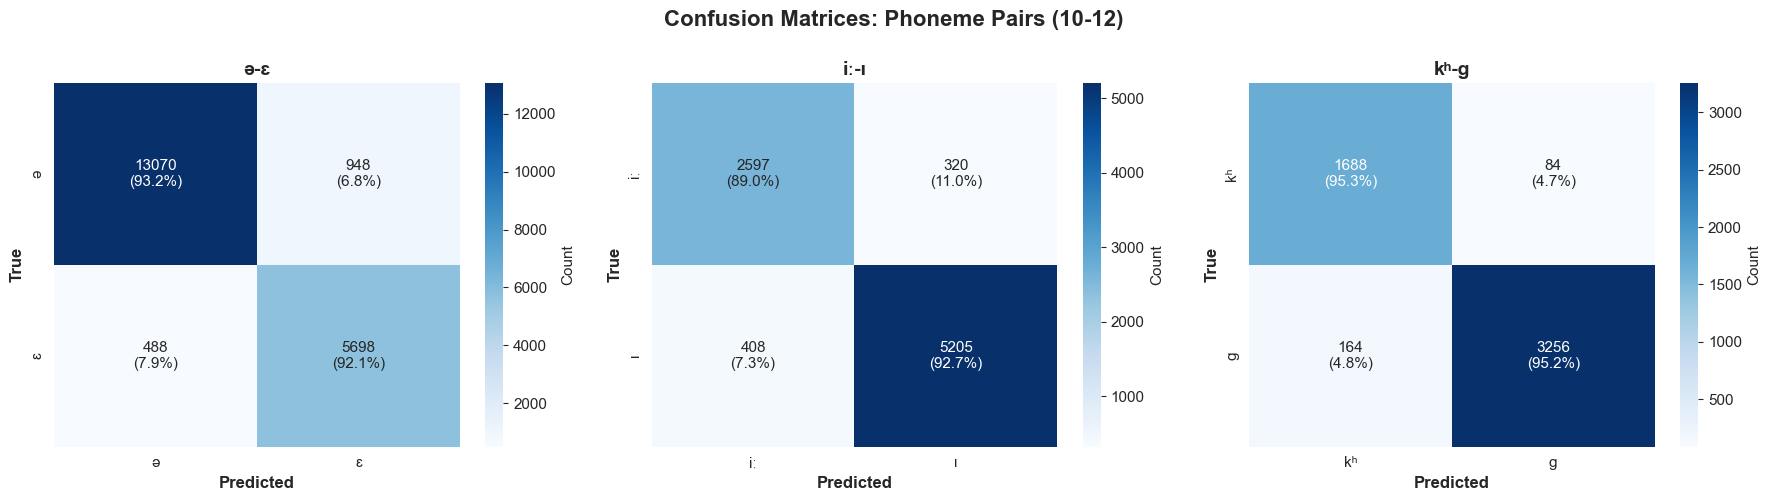

In [28]:
# Part 2.4: Confusion Matrices - Models 10-12
plot_confusion_matrices(all_predictions, start_idx=9, end_idx=12, n_cols=3, title_suffix=' (10-12)')


## Part 2.5: Confusion Matrices - Models 13-15


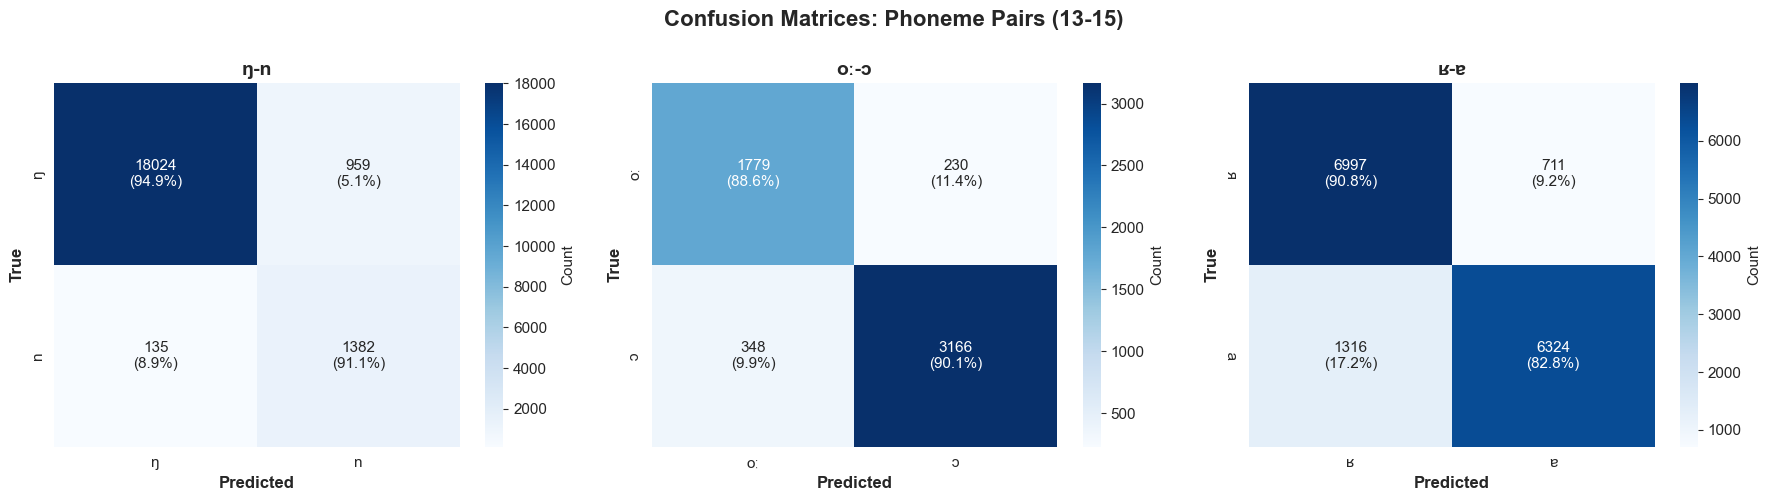

In [29]:
# Part 2.5: Confusion Matrices - Models 13-15
plot_confusion_matrices(all_predictions, start_idx=12, end_idx=15, n_cols=3, title_suffix=' (13-15)')


## Part 2.6: Confusion Matrices - Models 16-18


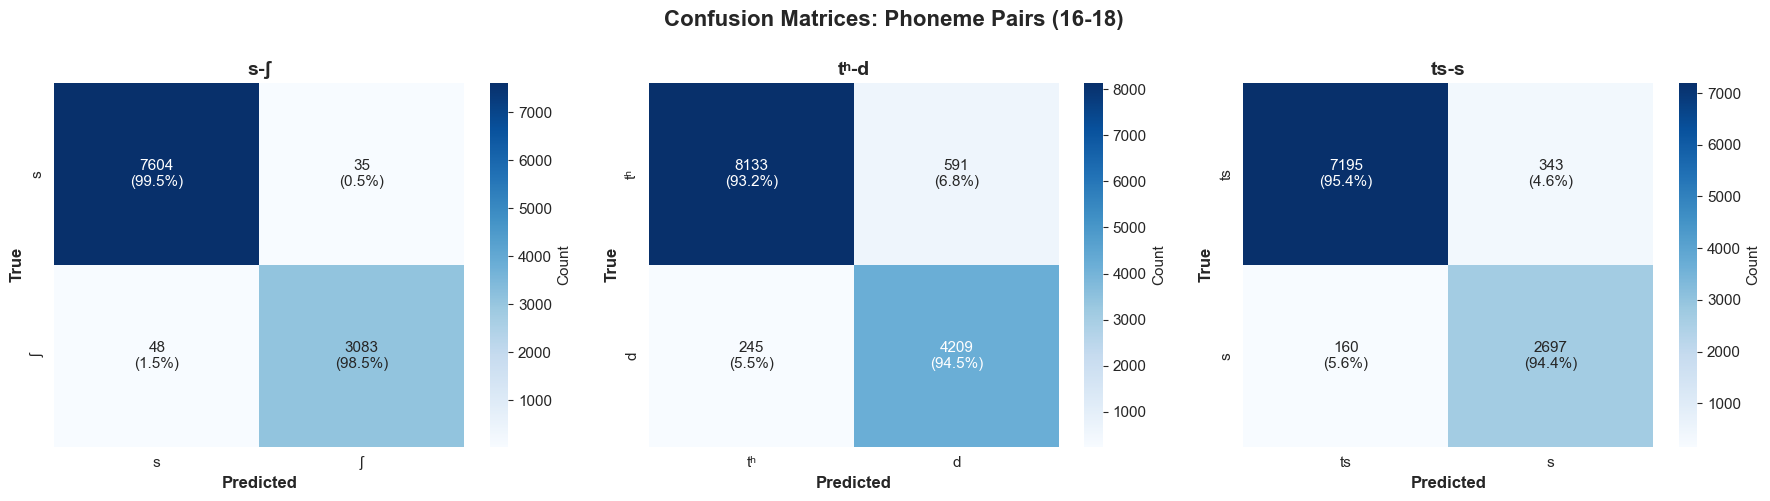

In [30]:
# Part 2.6: Confusion Matrices - Models 16-18
plot_confusion_matrices(all_predictions, start_idx=15, end_idx=18, n_cols=3, title_suffix=' (16-18)')


## Part 2.7: Confusion Matrices - Models 19-22


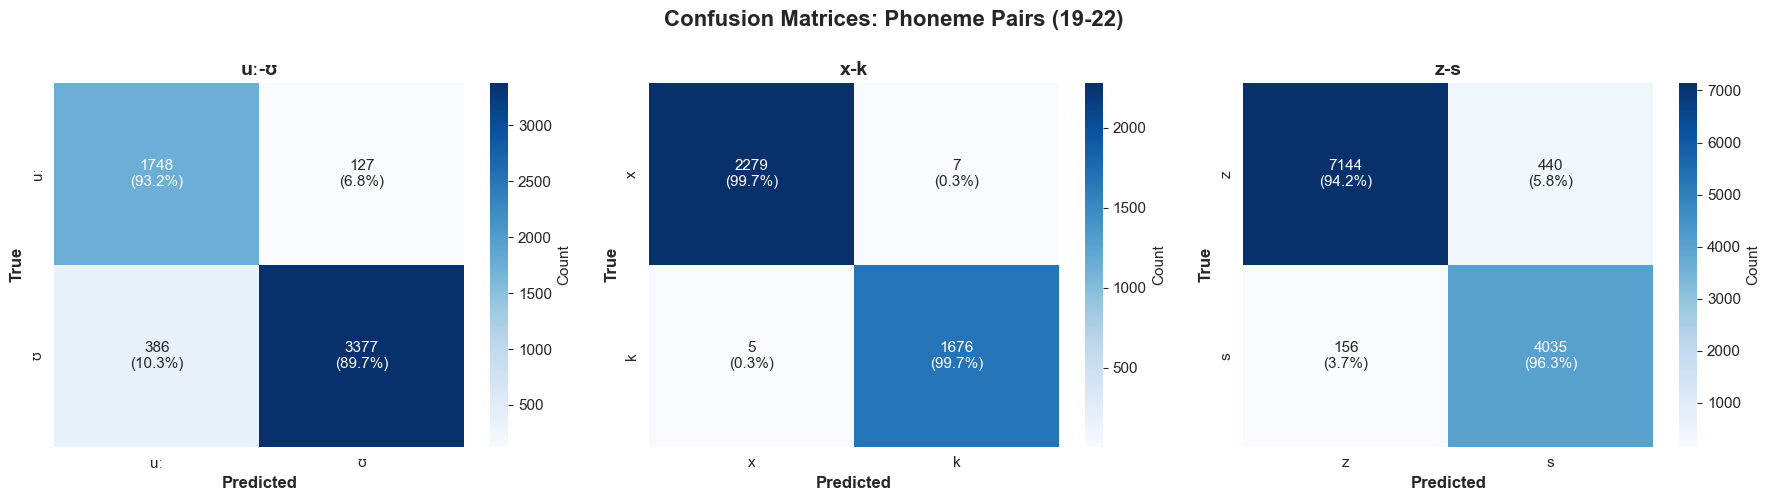

In [31]:
# Part 2.7: Confusion Matrices - Models 19-22
plot_confusion_matrices(all_predictions, start_idx=18, end_idx=22, n_cols=3, title_suffix=' (19-22)')


## Part 2.8: Summary Statistics


In [32]:
# Print summary statistics for all models
print("="*80)
print("CONFUSION MATRIX SUMMARY")
print("="*80)
for pair_key, predictions_df in all_predictions.items():
    config = MODELS_CONFIG[pair_key]
    metrics = all_metrics[pair_key]
    y_true = predictions_df['true_class_encoded'].values
    y_pred = predictions_df['predicted_class_encoded'].values
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"\n{config['name']}:")
    print(f"  Class {config['class_0']}: {cm[0, 0]} correct, {cm[0, 1]} misclassified as {config['class_1']}")
    print(f"  Class {config['class_1']}: {cm[1, 1]} correct, {cm[1, 0]} misclassified as {config['class_0']}")
    print(f"  Total accuracy: {metrics['accuracy']:.4f}")


CONFUSION MATRIX SUMMARY

a-ɛ:
  Class a: 7775 correct, 207 misclassified as ɛ
  Class ɛ: 6179 correct, 131 misclassified as a
  Total accuracy: 0.9764

aː-a:
  Class aː: 6608 correct, 1378 misclassified as a
  Class a: 3409 correct, 461 misclassified as aː
  Total accuracy: 0.8449

aɪ̯-aː:
  Class aɪ̯: 2218 correct, 368 misclassified as aː
  Class aː: 5537 correct, 407 misclassified as aɪ̯
  Total accuracy: 0.9091

aʊ̯-aː:
  Class aʊ̯: 2084 correct, 25 misclassified as aː
  Class aː: 3817 correct, 27 misclassified as aʊ̯
  Total accuracy: 0.9913

b-p:
  Class b: 3750 correct, 138 misclassified as p
  Class p: 1553 correct, 95 misclassified as b
  Total accuracy: 0.9579

d-t:
  Class d: 8309 correct, 468 misclassified as t
  Class t: 10527 correct, 645 misclassified as d
  Total accuracy: 0.9442

g-k:
  Class g: 2218 correct, 162 misclassified as k
  Class k: 3198 correct, 120 misclassified as g
  Total accuracy: 0.9505

ç-x:
  Class ç: 1642 correct, 3 misclassified as x
  Class x: 405

## Part 3: F1-Score Comparison Across All Models


PERFORMANCE COMPARISON ACROSS ALL MODELS
Phoneme Pair  F1-Score  Accuracy  Precision   Recall  ROC-AUC
         ç-x  0.999298  0.999298   0.999298 0.999298 0.999982
         x-k  0.996975  0.996975   0.996976 0.996975 0.999943
         s-ʃ  0.992289  0.992293   0.992287 0.992293 0.996802
      aʊ̯-aː  0.991266  0.991265   0.991267 0.991265 0.999389
         a-ɛ  0.976365  0.976350   0.976435 0.976350 0.996311
         b-p  0.958066  0.957912   0.958354 0.957912 0.988162
        kʰ-g  0.952479  0.952234   0.953211 0.952234 0.988240
        ts-s  0.952065  0.951611   0.953215 0.951611 0.990172
         ŋ-n  0.951741  0.946634   0.962801 0.946634 0.978942
         g-k  0.950444  0.950509   0.950486 0.950509 0.990429
         z-s  0.949731  0.949384   0.951240 0.949384 0.988731
         d-t  0.944263  0.944208   0.944469 0.944208 0.987228
        tʰ-d  0.937105  0.936561   0.939026 0.936561 0.984350
         ə-ɛ  0.929606  0.928925   0.931353 0.928925 0.977745
        iː-ɪ  0.914951  0.914

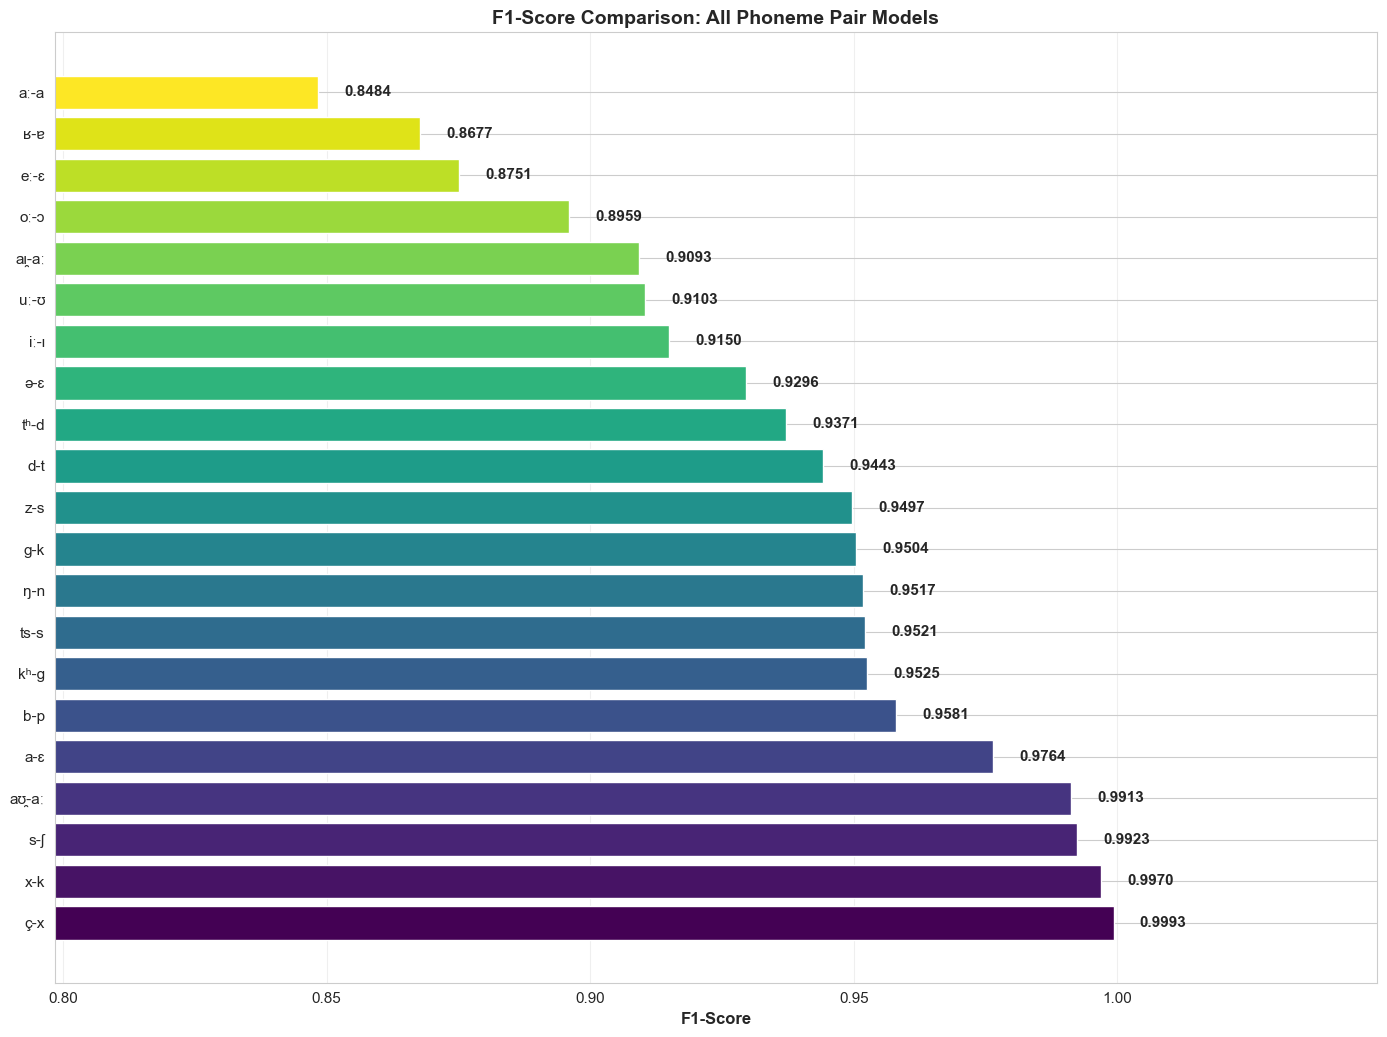

BEST MODEL: ç-x
F1-Score: 0.9993
Accuracy: 0.9993
ROC-AUC: 1.0000


In [33]:
# Create F1-score comparison
comparison_data = []
for pair_key, metrics in all_metrics.items():
    config = MODELS_CONFIG[pair_key]
    comparison_data.append({
        'Phoneme Pair': config['name'],
        'F1-Score': metrics['f1'],
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'ROC-AUC': metrics['roc_auc']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("="*80)
print("PERFORMANCE COMPARISON ACROSS ALL MODELS")
print("="*80)
print("" + comparison_df.to_string(index=False))

# Create visualization
n_models = len(comparison_df)
fig_height = max(8, n_models * 0.5)  # At least 0.5 units per model
fig, ax = plt.subplots(figsize=(14, fig_height))

# Create bar plot with colors for all models (using colormap for better visualization)
import matplotlib.cm as cm
n_models = len(comparison_df)
colors = cm.viridis(np.linspace(0, 1, n_models))
bars = ax.barh(comparison_df['Phoneme Pair'], comparison_df['F1-Score'], color=colors)

# Add value labels on bars
for i, (bar, f1) in enumerate(zip(bars, comparison_df['F1-Score'])):
    ax.text(f1 + 0.005, i, f'{f1:.4f}', va='center', fontweight='bold', fontsize=11)

ax.set_xlabel('F1-Score', fontweight='bold', fontsize=12)
ax.set_title('F1-Score Comparison: All Phoneme Pair Models', fontweight='bold', fontsize=14)
# Adjust xlim based on min/max F1 scores
min_f1 = comparison_df['F1-Score'].min()
max_f1 = comparison_df['F1-Score'].max()
ax.set_xlim([min_f1 - 0.05, max_f1 + 0.05])
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Print best model
best_model = comparison_df.iloc[0]
print(f"{'='*80}")
print(f"BEST MODEL: {best_model['Phoneme Pair']}")
print(f"{'='*80}")
print(f"F1-Score: {best_model['F1-Score']:.4f}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"ROC-AUC: {best_model['ROC-AUC']:.4f}")
print(f"{'='*80}")
